In [1]:
%reload_ext vimception

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
cd ~/workspace/heimdall/

/home/richard/workspace/heimdall


In [2]:
%matplotlib inline
%config IPCompleter.greedy=True
import pylab
pylab.rcParams['figure.figsize'] = [10.0, 8.0]

In [3]:
import heimdall
import astroid
import sys, os
import numpy as np
import logging
logging.getLogger().setLevel(logging.DEBUG)

# Optimizer

In [4]:
#import data_flow; data_flow = reload(data_flow)
import code_reader; code_reader = reload(code_reader)
import heimdall; heimdall = reload(heimdall)
import watcher; watcher = reload(watcher)
import optimizer; optimizer = reload(optimizer)
import modcode; modcode = reload(modcode)
from tests import code2; code2 = reload(code2)
from tests import code3; code3 = reload(code3)
from tests import code4; code4 = reload(code4)
from tests import code5; code5 = reload(code5)
from tests import code6; code6 = reload(code6)
astroid.MANAGER.clear_cache()

In [25]:
optimizer.DRYRUN = True

In [5]:
%pdb off
heim = heimdall.Heimdall(max_nesting=2, prof_shot_time=4)
heim.run('code4.g(7)', globals(), locals())

Automatic pdb calling has been turned OFF
g iter 0 Took 3.158855 seconds, sum is 1141688791576.546631

INFO:heimdall:Null row: ('profile', 0, 'profiler')
DEBUG:heimdall:Found node root: PStatRow( '','profile',0,'code4.g(7)', 1 )



Going to watch for ('/home/richard/workspace/heimdall/tests/code4.py', 'f1')
g iter 1 Took 3.213033 seconds, sum is 1141688791576.546631
Pushing f1
Pushing func2
Returning from func2, frame is <frame object at 0x96ee540>, outer is <frame object at 0x96e91d0>
Popped func2
self.frames_being_traced is  {<frame object at 0x96e91d0>: <watcher.FuncWatchStatus object at 0x7efddf1112d0>}
frame <frame object at 0x96ee540> wasn't in frames_being_traced
Pushing func2
Returning from func2, frame is <frame object at 0x96ee540>, outer is <frame object at 0x96e91d0>
Popped func2
self.frames_being_traced is  {<frame object at 0x96e91d0>: <watcher.FuncWatchStatus object at 0x7efddf1112d0>}
frame <frame object at 0x96ee540> wasn't in frames_being_traced
Returning from f1, frame is <frame object at 0x96e91d0>, outer is <frame object at 0x7efde0014a28>
Popped f1
self.frames_being_traced is  {<frame object at 0x96e91d0>: <watcher.FuncWatchStatus object at 0x7efddf1112d0>}
Finishing watch of ('/home/richar

In [7]:
list(enumerate(heim.dfg.stmt_sequence))

[(0, ('/home/richard/workspace/heimdall/tests/code4.py', 17, 'line')),
 (1, ('/home/richard/workspace/heimdall/tests/code4.py', 18, 'line')),
 (2, ('/home/richard/workspace/heimdall/tests/code4.py', 19, 'line')),
 (3, ('/home/richard/workspace/heimdall/tests/code4.py', 20, 'line')),
 (4, ('/home/richard/workspace/heimdall/tests/code4.py', 21, 'line')),
 (5, ('/home/richard/workspace/heimdall/tests/code4.py', 12, 'call')),
 (6, ('/home/richard/workspace/heimdall/tests/code4.py', 13, 'line')),
 (7, ('/home/richard/workspace/heimdall/tests/code4.py', 13, 'return')),
 (8, ('/home/richard/workspace/heimdall/tests/code4.py', 22, 'line')),
 (9, ('/home/richard/workspace/heimdall/tests/code4.py', 12, 'call')),
 (10, ('/home/richard/workspace/heimdall/tests/code4.py', 13, 'line')),
 (11, ('/home/richard/workspace/heimdall/tests/code4.py', 13, 'return')),
 (12, ('/home/richard/workspace/heimdall/tests/code4.py', 22, 'return'))]

Going to follow_function_call:  func2(j, k) stmt is  4
{'a': LocalAssignment(ass_edge=<ArgPassEdge: code4.py 21(Name(j))@4->code4.py 12(AssName(a))@5>, dfg=<data_flow.DataFlowGraph object at 0x7f18d1f77890>),
 'b': LocalAssignment(ass_edge=<ArgPassEdge: code4.py 21(Name(k))@4->code4.py 12(AssName(b))@5>, dfg=<data_flow.DataFlowGraph object at 0x7f18d1f77890>)}
Going to follow_function_call:  func2(t1, m) stmt is  8
{'a': LocalAssignment(ass_edge=<ArgPassEdge: code4.py 22(Name(t1))@8->code4.py 12(AssName(a))@9>, dfg=<data_flow.DataFlowGraph object at 0x7f18d1f77890>),
 'b': LocalAssignment(ass_edge=<ArgPassEdge: code4.py 22(Name(m))@8->code4.py 12(AssName(b))@9>, dfg=<data_flow.DataFlowGraph object at 0x7f18d1f77890>)}
{'j': LocalAssignment(ass_edge=<AssignEdge: code4.py 18(Call rng.uniform())@1->code4.py 18(AssName(j))@1>, dfg=<data_flow.DataFlowGraph object at 0x7f18d1f77890>),
 'k': LocalAssignment(ass_edge=<AssignEdge: code4.py 19(Call rng.uniform())@2->code4.py 19(AssName(k))@2>, d

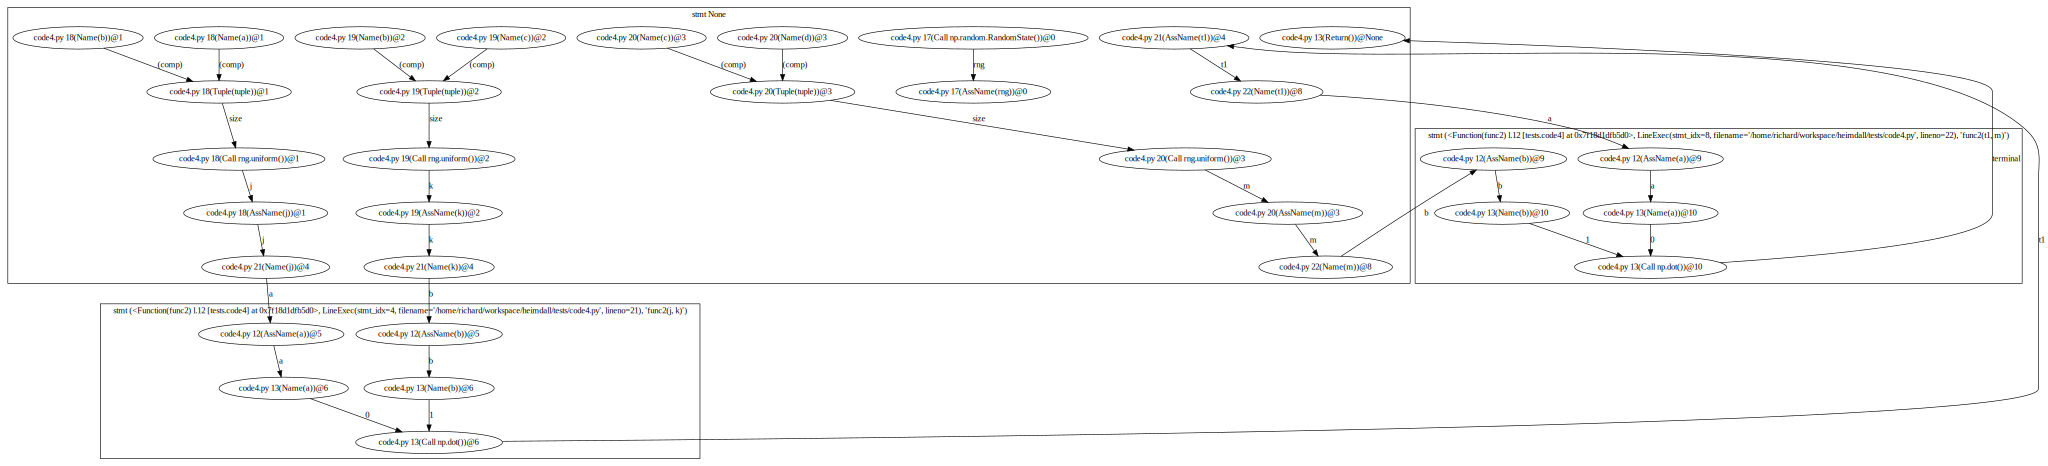

In [17]:
import data_flow
data_flow.analyze_flow(heim.dfg.stmt_sequence, heim.dfg.loop_stats).draw_digraph()

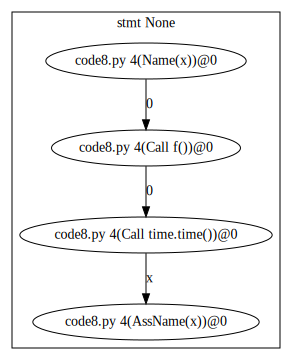

In [4]:
import data_flow
data_flow.analyze_flow([('/home/richard/workspace/heimdall/tests/code8.py', 4, 'line'),], {}).draw_digraph()


In [27]:
%debug

> /home/richard/workspace/heimdall/data_flow.py(127)process_one_statement()
    126     asts = dfg.line_to_asts[filename][lineno]
--> 127     assert len(asts) == 1, "Multi-statement lines not implemented yet"
    128     for st in asts:

ipdb> print asts
set([<Assign() l.4 [tests.code8] at 0x7f4e9fc96a10>, <Function(g) l.4 [tests.code4] at 0x7f4ea345da50>])
ipdb> exit


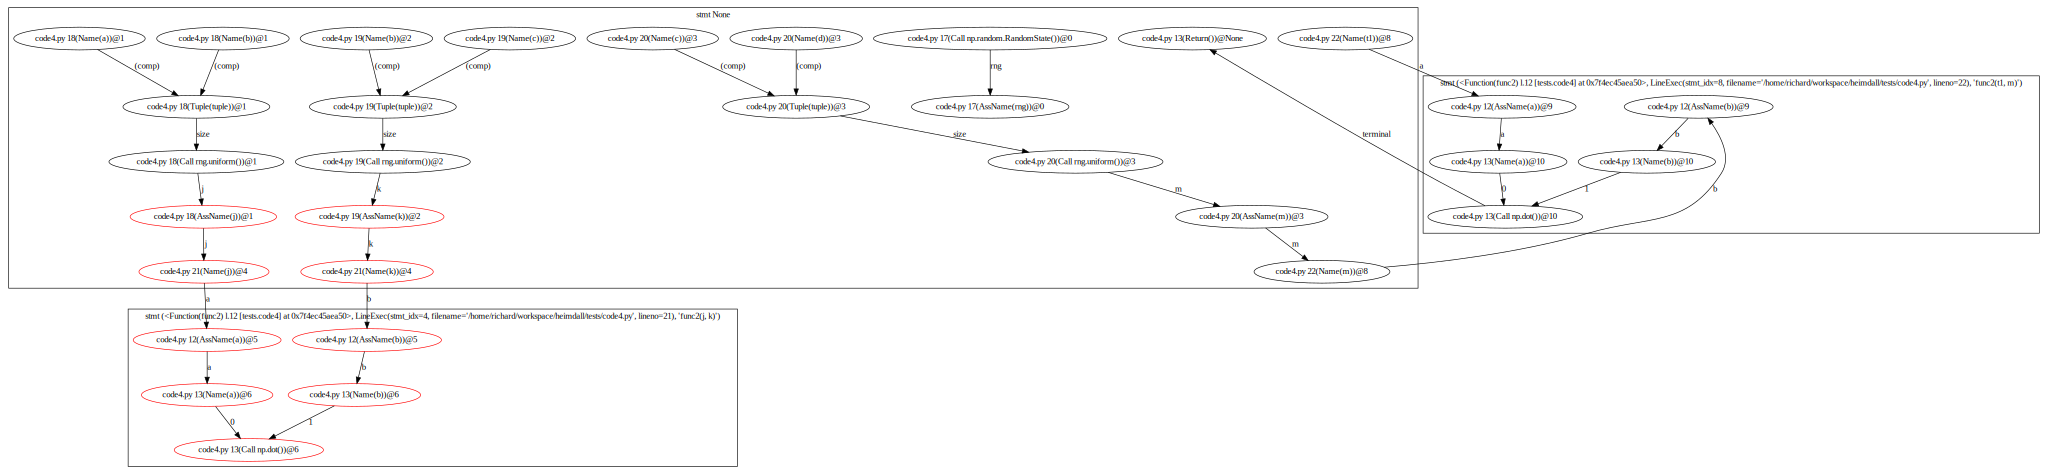

In [8]:
heim.dfg.draw_digraph(colors={n: 'red' for n in last_subgraph})

In [11]:
out_edges = {e for e in heim.dfg.edges if e.n1 in last_subgraph and e.n2 not in last_subgraph}
out_nodes = {e.n1 for e in out_edges}


In [12]:
out_nodes

set()

In [10]:
func_calls = [watcher.NeededInfo(heim.dfg.stmt_sequence, n.line.stmt_idx, n.ast_node.func.as_string(), n)
                for n in heim.dfg.nodes if isinstance(n, data_flow.DataFlowGraph.ExtCallNode)]


In [11]:
func_calls

[NeededInfo: ('/home/richard/workspace/heimdall/tests/code2.py', 20, 1, 'rng.uniform', <ExtCallNode: code2.py 20(Call rng.uniform())@1>),
 NeededInfo: ('/home/richard/workspace/heimdall/tests/code2.py', 23, 10, 'np.dot', <ExtCallNode: code2.py 23(Call np.dot())@10>),
 NeededInfo: ('/home/richard/workspace/heimdall/tests/code2.py', 16, 8, 'rng.uniform', <ExtCallNode: code2.py 16(Call rng.uniform())@8>),
 NeededInfo: ('/home/richard/workspace/heimdall/tests/code2.py', 13, 4, 'rng.uniform', <ExtCallNode: code2.py 13(Call rng.uniform())@4>),
 NeededInfo: ('/home/richard/workspace/heimdall/tests/code2.py', 24, 11, 'np.dot', <ExtCallNode: code2.py 24(Call np.dot())@11>)]

In [12]:
list(enumerate(last_stmt_sequence))

[(0, ('/home/richard/workspace/heimdall/tests/code6.py', 18, 'line')),
 (1, ('/home/richard/workspace/heimdall/tests/code6.py', 19, 'line')),
 (2, ('/home/richard/workspace/heimdall/tests/code6.py', 20, 'line')),
 (3, ('/home/richard/workspace/heimdall/tests/code6.py', 21, 'line')),
 (4, ('/home/richard/workspace/heimdall/tests/code6.py', 22, 'line')),
 (5, ('/home/richard/workspace/heimdall/tests/code6.py', 12, 'call')),
 (6, ('/home/richard/workspace/heimdall/tests/code6.py', 14, 'line')),
 (7, ('/home/richard/workspace/heimdall/tests/code6.py', 14, 'return')),
 (8, ('/home/richard/workspace/heimdall/tests/code6.py', 12, 'call')),
 (9, ('/home/richard/workspace/heimdall/tests/code6.py', 14, 'line')),
 (10, ('/home/richard/workspace/heimdall/tests/code6.py', 14, 'return')),
 (11, ('/home/richard/workspace/heimdall/tests/code6.py', 22, 'return'))]

Processing  LineExec(stmt_idx=0, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=18)
New stmt_idx: 1
Next idx: 1
Processing  LineExec(stmt_idx=1, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=19)
New stmt_idx: 2
Next idx: 2
Processing  LineExec(stmt_idx=2, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=20)
New stmt_idx: 3
Next idx: 3
Processing  LineExec(stmt_idx=3, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=21)
New stmt_idx: 4
Next idx: 4
Processing  LineExec(stmt_idx=4, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=22)
Going to follow_function_call:  func2(j, k) stmt is  4
Processing  LineExec(stmt_idx=5, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=13)
New stmt_idx: 6
Next idx: 6
Processing  LineExec(stmt_idx=6, filename='/home/richard/workspace/heimdall/tests/code5.py', lineno=14)
New stmt_idx: 7
Next idx: 7
Going to follow_function_call:  func2(func2(j, k)

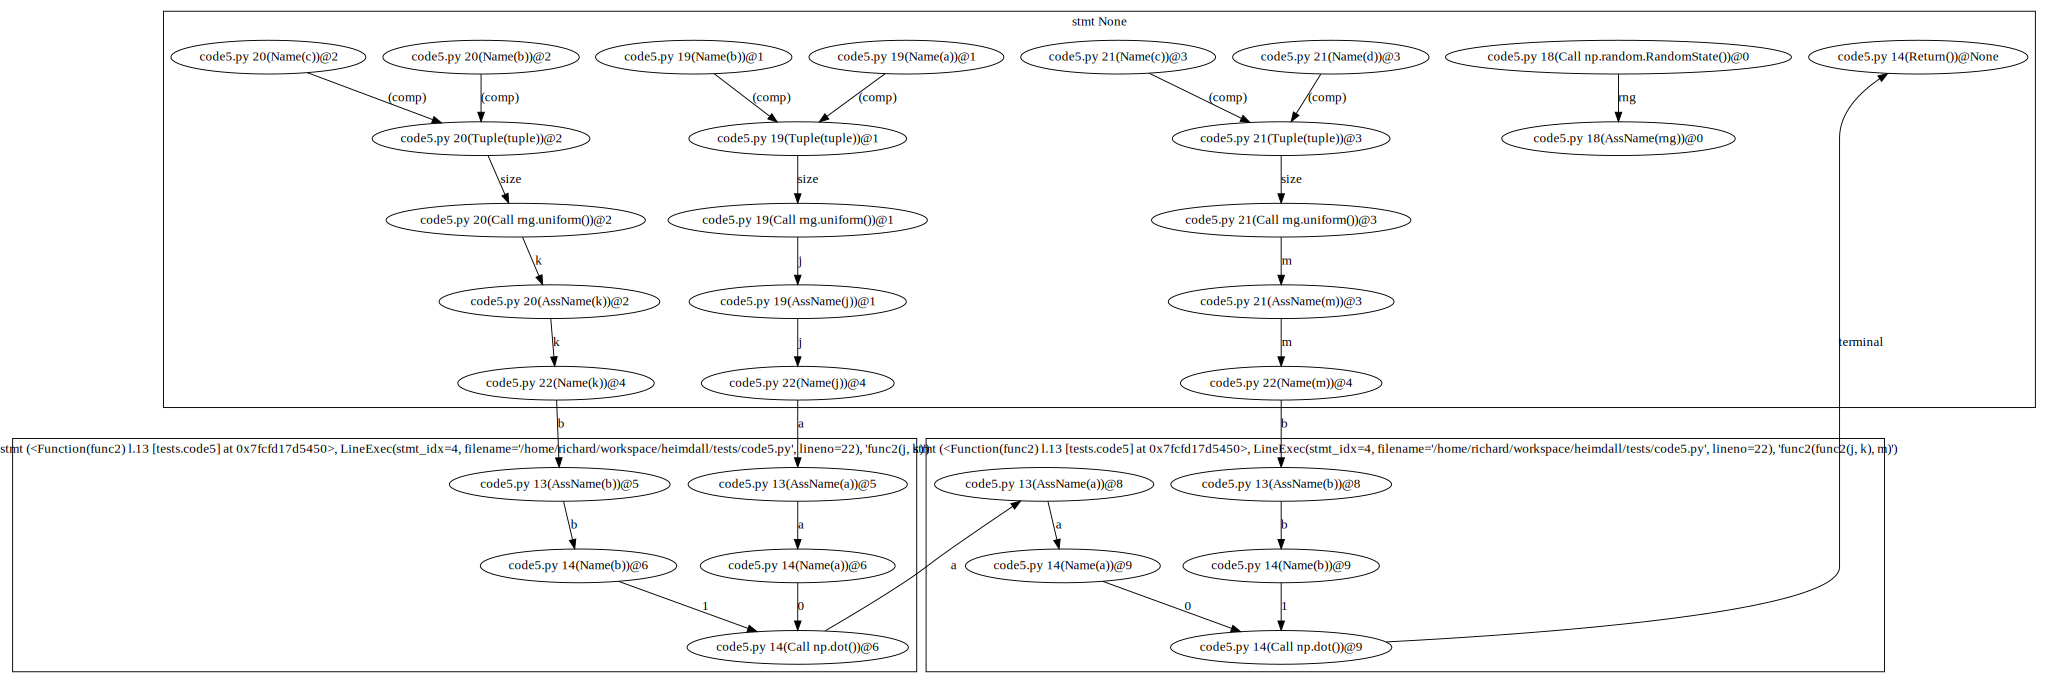

In [32]:
data_flow.analyze_flow(last_stmt_sequence, heim.watcher.loopstats).draw_digraph()

In [26]:
%pdb on
modcode.replace_subgraph_and_code(heim.dfg, last_subgraph, input_nodes, new_chain_expr, assumptions)

Automatic pdb calling has been turned ON
prepare_statement visiting  3
prepare_statement visiting  4


AttributeError: 'Class' object has no attribute 'args'

> /usr/local/lib/python2.7/dist-packages/astroid-1.3.6-py2.7.egg/astroid/bases.py(73)__getattr__()
     72             return self.__dict__[name]
---> 73         return getattr(self._proxied, name)
     74 

ipdb> up
> /home/richard/workspace/heimdall/modcode.py(544)prepare_statement_with_internal_calls()
    543                     else:
--> 544                         noneconst.parent=new_callfunc.args
    545                         new_callfunc.args[i] = noneconst

ipdb> print new_callfunc
Const(NoneType)
ipdb> print path
['value', 'args', 0]
ipdb> print sn
code5.py 22(Call func2())@4
ipdb> print sn.ast_node
CallFunc()
ipdb> print sn.ast_node.as_string()
func2(j, k)
ipdb> print new_callfunc.as_string()
None
ipdb> print stmt_copy
Return()
ipdb> print smt
*** NameError: name 'smt' is not defined
ipdb> print stmt
Return()
ipdb> print stmt_copy.as_string()
return func2(None, None, j2=j, k3=k, m4=m, behavior15=2)
ipdb> print stmt.as_string()
return func2(func2(j, k), m)
ipdb> l
    539 

In [7]:
%qtconsole

In [49]:
[(n, type(n), n.ast_node) for n in heim.dfg.nodes if 'func2' in str(n)]

[(code3.py 16(Call func2()),
  data_flow.ExprNode,
  <CallFunc() l.16 [tests.code3] at 0x7f8cf41bfc50>)]

In [17]:
import matrix_chain
matrix_chain = reload(matrix_chain)
matrix_chain.matrix_chain_tree([(500,2500),(2500,4000), (4000,1000)])

In [99]:
import gc; gc.collect()
#astroid.MANAGER.clear_cache()

9

In [ ]:
sizes = []
for o in gc.get_objects():
    try:
        size= asizeof.asizeof(o)
        if size > 10000000:
            print o,size
            sizes.append((o,size ))
    except:
        pass

In [53]:
heim.dfg.nodes

{<ExprNode: code4.py 17(Call np.random.RandomState())@0>,
 <ExprNode: code4.py 18(Name(a))@1>,
 <ExprNode: code4.py 18(Name(rng))@1>,
 <ExprNode: code4.py 18(Getattr(uniform))@1>,
 <ExprNode: code4.py 18(Tuple(tuple))@1>,
 <ExprNode: code4.py 18(Name(b))@1>,
 <ExprNode: code4.py 19(Name(b))@2>,
 <ExprNode: code4.py 19(Tuple(tuple))@2>,
 <ExprNode: code4.py 19(Name(rng))@2>,
 <ExprNode: code4.py 19(Getattr(uniform))@2>,
 <ExprNode: code4.py 20(Name(c))@3>,
 <ExprNode: code4.py 19(Name(c))@2>,
 <ExprNode: code4.py 20(Name(rng))@3>,
 <ExprNode: code4.py 20(Getattr(uniform))@3>,
 <ExprNode: code4.py 20(Tuple(tuple))@3>,
 <ExprNode: code4.py 20(Name(d))@3>,
 <ExprNode: code4.py 21(Name(j))@4>,
 <ExprNode: code4.py 21(Name(k))@4>,
 <ExprNode: code4.py 13(Name(a))@6>,
 <ExprNode: code4.py 13(Name(b))@6>,
 <ExprNode: code4.py 13(Call np.dot())@7>,
 <ExprNode: code4.py 22(Name(m))@8>,
 <ExprNode: code4.py 22(Name(t1))@8>,
 <ExprNode: code4.py 13(Name(b))@10>,
 <ExprNode: code4.py 13(Name(a))@10

In [102]:
import astroid
astroid = reload(astroid)

ImportError: cannot import name inference

In [100]:
import objgraph

In [101]:
objgraph.show_most_common_types(limit=20)

function                   17517
list                       12700
dict                       11122
tuple                      4409
weakref                    2558
Arguments                  2050
Function                   2050
wrapper_descriptor         1806
type                       1633
builtin_function_or_method 1594
getset_descriptor          1409
method_descriptor          1113
module                     996
FontEntry                  740
cell                       724
set                        465
member_descriptor          456
property                   435
instance                   411
instancemethod             348


In [55]:
heim = None

In [91]:
import random
import objgraph
objgraph.show_backrefs([objgraph.by_type('Arguments')[random.randint(0,2000)]], max_depth=15)

Graph written to objects.dot (361 nodes)
Image generated as objects.png


In [73]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [70]:
obj

<Arguments() l.0 [__builtin__] at 0x7f3913732fd0>

In [84]:
dir(str.lstrip)

['__call__',
 '__class__',
 '__delattr__',
 '__doc__',
 '__format__',
 '__get__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__name__',
 '__new__',
 '__objclass__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [85]:
str.lstrip.__dict__

AttributeError: 'method_descriptor' object has no attribute '__dict__'

In [89]:
str.__dict__

<dictproxy {'__add__': <slot wrapper '__add__' of 'str' objects>,
 '__contains__': <slot wrapper '__contains__' of 'str' objects>,
 '__doc__': "str(object='') -> string\n\nReturn a nice string representation of the object.\nIf the argument is a string, the return value is the same object.",
 '__eq__': <slot wrapper '__eq__' of 'str' objects>,
 '__format__': <method '__format__' of 'str' objects>,
 '__ge__': <slot wrapper '__ge__' of 'str' objects>,
 '__getattribute__': <slot wrapper '__getattribute__' of 'str' objects>,
 '__getitem__': <slot wrapper '__getitem__' of 'str' objects>,
 '__getnewargs__': <method '__getnewargs__' of 'str' objects>,
 '__getslice__': <slot wrapper '__getslice__' of 'str' objects>,
 '__gt__': <slot wrapper '__gt__' of 'str' objects>,
 '__hash__': <slot wrapper '__hash__' of 'str' objects>,
 '__le__': <slot wrapper '__le__' of 'str' objects>,
 '__len__': <slot wrapper '__len__' of 'str' objects>,
 '__lt__': <slot wrapper '__lt__' of 'str' objects>,
 '__mod__': 

In [92]:
import sys

In [95]:
del sys.modules['astroid']